# Main Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from matplotlib.ticker import MultipleLocator
import re
import os

# import data
file_cell_based_1x = os.path.join("..", "clean-files-ul", "cb" , "1", "rep_020.csv")
file_cell_free_1x = os.path.join("..", "clean-files-ul", "cf" , "1", "rep_020.csv")

## Calculations for 1X Scenarios

In [25]:
# Read content of the file
df_cb_1x = pd.read_csv(file_cell_based_1x)
df_cf_1x = pd.read_csv(file_cell_free_1x)

## Cell-Based 1x UE Throughput x Time

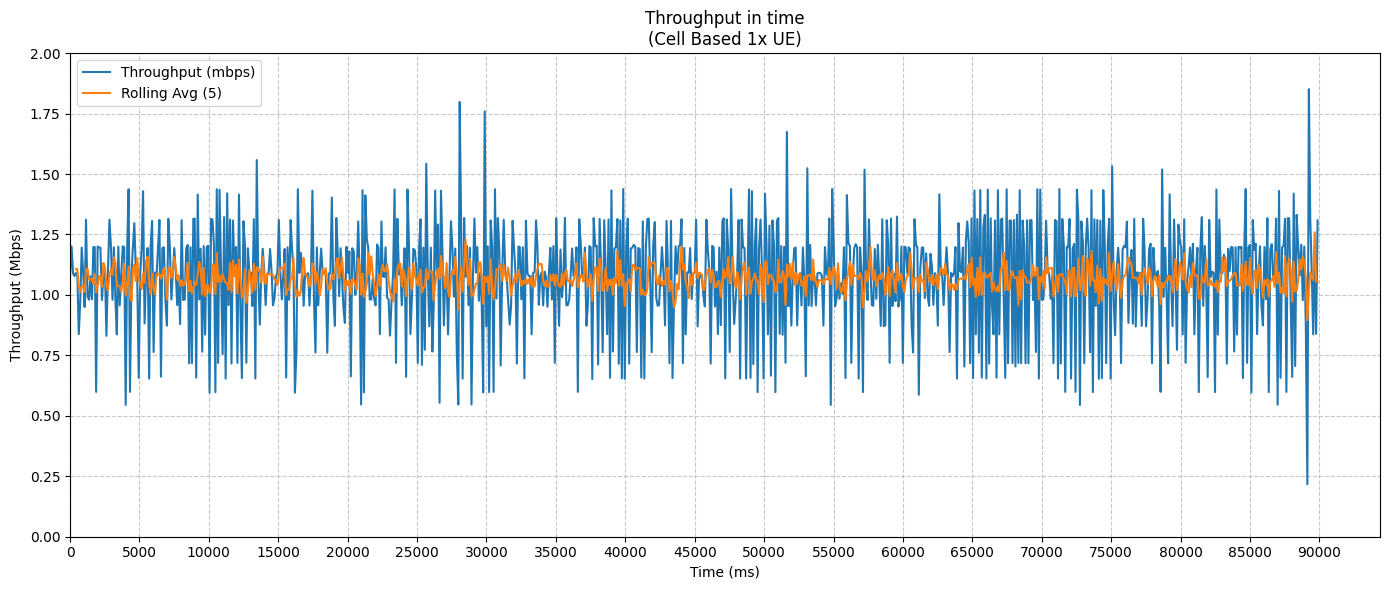

In [26]:
# Round of throughput values to 3 decimal places
df_cb_1x["Throughput_Mbps"] = df_cb_1x["Throughput_Mbps"].round(3)

# Calculate rolling average with a window of 5
df_cb_1x["Rolling Avg (Mbps)"] = df_cb_1x["Throughput_Mbps"].rolling(window=5).mean()

# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Throughput_Mbps", data=df_cb_1x, label="Throughput (mbps)")
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cb_1x, label="Rolling Avg (5)")
plt.title("Throughput in time\n(Cell Based 1x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Cell-Free 1x UE Throughput x Time

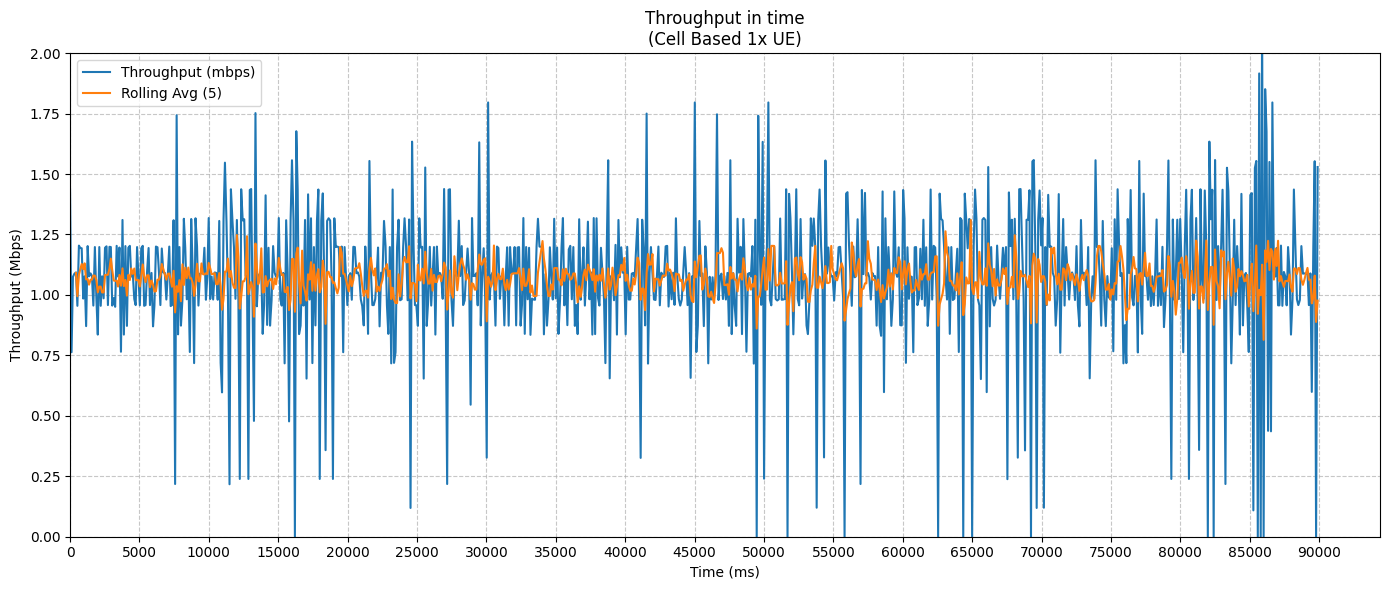

In [27]:
# Round of throughput values to 3 decimal places
df_cf_1x["Throughput_Mbps"] = df_cf_1x["Throughput_Mbps"].round(3)

# Calculate rolling average with a window of 5
df_cf_1x["Rolling Avg (Mbps)"] = df_cf_1x["Throughput_Mbps"].rolling(window=5).mean()

# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Throughput_Mbps", data=df_cf_1x, label="Throughput (mbps)")
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cf_1x, label="Rolling Avg (5)")
plt.title("Throughput in time\n(Cell Based 1x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Main statistics 1X Scenarios

### Cell-Based

In [28]:
print(df_cb_1x["Throughput_Mbps"].describe())

count    852.000000
mean       1.068820
std        0.231976
min        0.217000
25%        0.954000
50%        1.092000
75%        1.202000
max        1.851000
Name: Throughput_Mbps, dtype: float64


### Cell-Free

In [29]:
print(df_cf_1x["Throughput_Mbps"].describe())

count    853.000000
mean       1.068312
std        0.291924
min        0.000000
25%        0.959000
50%        1.078000
75%        1.200000
max        2.155000
Name: Throughput_Mbps, dtype: float64
